MIKE MINNEBACH - 500903092 - FinTech Systems Development

In [171]:
import re #to write regex
import pandas as pd #for the dataframe
import datetime #for date formatting
import os #to import the directory that contains the swift messages
import itertools #to split returns based on strings and numbers
import matplotlib.pyplot as plt #for visualization

Convert a MT103 SWIFT message 
(https://www2.swift.com/knowledgecentre/products/Standards%20MT) into the 
following data structure. Write a code in your chosen language to convert the message to 
the following data structure. The notEmpty fields are mandatory. (25 points)
Converting each of the mandatory fields correctly carries 1 point and converting each of 
the non-mandatory fields contains 0.5 points (15+8.5+1.5). 1.5 points are given for coding 
style.

In [172]:
file = open("MT103.txt", 'r') #read the file

In [173]:
#initiate lookup variables
#regex to identify the items which are needed in the dataframe
transaction_re = re.compile(r'transaction_|instrument_|originator_|beneficiary_|incoming_|outgoing_*') 

In [174]:
#####################################################################################################
# Create dataframe based on the MT103.txt example                                                   #
#####################################################################################################

columns = [] #initiate columns list
values = [] #initiate values list

#start for loop for each row in the .txt file
for line in file.read().split('\n'): 

    #if row starts with the value(s) mentioned in the regex, keep row
    if transaction_re.search(line): 

        #split row to extract the item (transaction id etc.) and corresponding value. 
        # This returns a list ['item', 'value']
        item = line.split() 

        #append item to columns, remove ":" for tidiness
        columns.append(item[0].replace(":","")) 

        #start try except for the values, as some values are empty, which stops Python
        try:
            #append value to values 
            values.append(item[1]) 
        
        #indexerrors occur when an index is appointed which is not available. 
        # Thus in case no value is entered. 
        except IndexError: 
            #if there is no value, append "No value entered" 
            values.append("No value entered") 

#explode() method is used to transform each element of a list to a separate record.
#code from https://stackoverflow.com/questions/66615474/create-a-pandas-dataframe-from-two-lists-column-1-is-first-list-column-2-is-se
df = pd.DataFrame([columns, values], index=['item', 'value']).T.explode('value') 

#print first five rows of the df to see what we are dealing with
df.head() 


,item,value
0,transaction_date,xDateTimeTz
1,transaction_id,notEmpty
2,transaction_message,notEmpty
3,transaction_currency,No value entered
4,transaction_amount,notEmpty


In [175]:
#####################################################################################################
# Transforming the df                                                                               #
#####################################################################################################
 
#transpose the df, columns to rows and vice versa
df = df.transpose() 

#column names are the first row
df.columns = df.iloc[0] 

#remove the first row, as these are the column names
df = df[1:1]

#drop // column, which was erroneously extracted
df.drop("//",axis=1,inplace=True)

#print first five rows of the df to see what we are dealing with
df.head()

item,transaction_date,transaction_id,transaction_message,transaction_currency,transaction_amount,transaction_type,transaction_direction,transaction_status,instrument_type,originator_full_name,...,beneficiary_first_name,beneficiary_middle_names_patronymic,beneficiary_last_name,beneficiary_address,beneficiary_country,beneficiary_account_number,beneficiary_branch_id,beneficiary_bic,beneficiary_fi_name,beneficiary_fi_country


In [176]:
#####################################################################################################
# Set the right datatypes                                                                           #
##################################################################################################### 

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df = df.astype({'transaction_id':'string',
                'transaction_message':'string',
                'transaction_currency':'string',
                'transaction_amount':'float',
                'transaction_type':'string',
                'transaction_direction':'string',
                'transaction_status':'string',
                'instrument_type':'string',
                'originator_full_name':'string',
                'originator_first_name':'string',
                'originator_middle_names_patronymic':'string',
                'originator_last_name':'string',
                'originator_address':'string',
                'originator_country':'string',
                'originator_account_number':'string',
                'originator_branch_id':'string',
                'originator_bic':'string',
                'originator_fi_name':'string',
                'originator_fi_country':'string',
                'incoming_intermediary_fi_bic':'string',
                'outgoing_intermediary_fi_bic':'string',
                'beneficiary_full_name':'string',
                'beneficiary_first_name':'string',
                'beneficiary_middle_names_patronymic':'string',
                'beneficiary_last_name':'string',
                'beneficiary_address':'string',
                'beneficiary_country':'string',
                'beneficiary_account_number':'string',
                'beneficiary_branch_id':'string',
                'beneficiary_bic':'string',
                'beneficiary_fi_name':'string',
                'beneficiary_fi_country':'string'})

#print the dtypes to see what we are dealing with
df.dtypes

item
transaction_date                       datetime64[ns]
transaction_id                                 string
transaction_message                            string
transaction_currency                           string
transaction_amount                            float64
transaction_type                               string
transaction_direction                          string
transaction_status                             string
instrument_type                                string
originator_full_name                           string
originator_first_name                          string
originator_middle_names_patronymic             string
originator_last_name                           string
originator_address                             string
originator_country                             string
originator_account_number                      string
originator_branch_id                           string
originator_bic                                 string
originator_fi_name     

In [177]:
#close the file 
file.close()

Fill the dataframe with  SWIFT MT103 messages.

In [178]:
#set directory with files to loop through, here are the examples located. 
#These examples we will use to fill the earlier made dataframe.
swift_messages = r'G:\Mijn Drive\School\Master in Digital Driven Business - AUAS Amsterdam\Q3\1. Fintech Systems dev\Assignment\examples'

In [179]:
#####################################################################################################
# In this section we will fill the dataframe with the examples. This process involves primarily     #
# data cleaning. In the latter part of the assignment, functions are made to identify AML           #       
# practises.                                                                                        #
##################################################################################################### 


#####################################################################################################
# First we initiate the variables with an empty string, in such a                                   #
# value (content of the SWIFT message) can be allocated during the code. This is done for each      #
# iteration of the loop.                                                                            #
#####################################################################################################     

#start looping over all the files in the directory. Set '' for each variable, such that each file starts with a 'clean sheet'
for message in os.listdir(swift_messages): 
    transaction_date = ''
    transaction_id = ''
    transaction_message = ''
    transaction_currency=''
    transaction_amount=''
    transaction_type=''
    transaction_direction=''
    transaction_status=''
    instrument_type=''
    originator_full_name=''
    originator_first_name=''
    originator_middle_names_patronymic=''
    originator_last_name=''
    originator_address =''
    originator_country=''
    originator_account_number=''
    originator_branch_id=''
    originator_bic=''
    originator_fi_name=''
    originator_fi_country=''
    incoming_intermediary_fi_bic=''
    outgoing_intermediary_fi_bic=''
    beneficiary_full_name=''
    beneficiary_first_name=''
    beneficiary_middle_names_patronymic=''
    beneficiary_last_name = ''
    beneficiary_address = ''
    beneficiary_country = '' 
    beneficiary_account_number = '' 
    beneficiary_branch_id=''
    beneficiary_bic=''
    beneficiary_fi_name=''
    beneficiary_fi_country=''

    #############################################################################################    
    #               General information retrieval, and splitting of the values                  #                         
    #############################################################################################
    
    #open the swift message
    swift_message = open(os.path.join(swift_messages, message), 'r') 
    
    #read the swift message
    file = swift_message.read()

    #transform the file in one long string, this method retains the splitting characters such as /n, and makes data extraction easier
    item_string = repr(file)

    #split the string based on the swift identifier, this can, among others, be :20: or :32A:.
    items = re.split(".(:[A-Za-z0-9]+:)",item_string)

    #remove the first item, as this contains the header of the message.
    items = items[1:]

    #make key value pairs in the list, this results in :20:MT103 0001. From this, we can extract the swift identifier and adjoining content
    res = [i+j for i,j in zip(items[::2], items[1::2])] 
    #code from https://stackoverflow.com/questions/5850986/joining-pairs-of-elements-of-a-list
    #items[::2] contains every other element, starting from the first element
    #items[1::2] contains every other element, starting from the second element (i.e., elements with odd indices).
    #zip(items[::2], items[1::2]) creates a new iterable that pairs up the elements from the two sub-lists - 
    #It adds the items that occur at the same position of the list
    #[i+j for i,j in zip(items[::2], items[1::2])] iterates through the pairs of elements and adds them together
    #an example of the return is ':50K:/DE98765432101234567890\\nCOMMERZBANK AG\\nHAMBURG, GERMANY\\n/COBADEHHXXX\\'
    #from this, we know the first four items [:4] contains the swift identifier
    #the rest [4:] contains the content
    
    #in this list we will store all ids (e.g. 20, 32A). We will clean the ids in the next step
    ids = []

    #clean the ids and feed them to the list ids
    for id_cont in res:                
        
        #replace the : with nothing, such we have identifiers as 20 and 32A
        mt103_identifier = id_cont[:4].replace(':','')

        #append to list
        ids.append(mt103_identifier)

    #############################################################################################    
    #                               Transaction content                                         #                         
    #############################################################################################

#transaction_id
    #check if '20' is in ids, to match the transaction_id
    if '20' in ids:
        for i in res:

            #find '20' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '20':

                #if found, the transaction id is the content that comes after the id, i.e. [4:]. Replace characters if needed for tidiness
                transaction_id = (i[4:]).replace('\\','')

    #if '20' is not in ids, transaction id is not found
    elif '20' not in ids:
        transaction_id = 'Not found'

#transaction_type
    #check if '23B' is in ids, to match the transaction_type
    if '23B' in ids:
        for i in res:

            #find '23B' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '23B':

                #if found, the transaction type is the content that comes after the id, i.e. [4:]. Replace characters if needed for tidiness
                transaction_type = (i[4:]).replace('\\','').replace(':','')
    
    #if '23B' is not in ids, transaction type is not found
    elif '23B' not in ids:
        transaction_type = 'Not found'

#transaction_date, transaction currency, transaction amount
    #check if '32A' is in ids, to match the transaction_date, transaction currency and transaction amount
    if '32A' in ids:
        for i in res:

            #find '32A' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '32A':

                #as the outcome returns this: '210322USD9899', it needs to be splitted. We simultaneously clean the data.
                split = ["".join(x) for _, x in itertools.groupby(i[4:].replace('\\','').replace(':','').replace(',',''), key=str.isdigit)] 
                #code from https://stackoverflow.com/questions/13673781/
                #splitting-a-string-where-it-switches-between-numeric-and-alphabetic-characters
                
                #A short explanation of the 'split' code will be given:
                #itertools.groupby(i[4:], key=str.isdigit) applies the groupby() function to the sliced string, 
                # grouping consecutive elements based on whether they are digits or not.
                #the for loop iterates over the groups made by 'groupby'
                #"".join(x) joins the elements in each group
                #thus, we go from 210322USD9899 to ['210322', 'USD', '9899']. Now we can apply slicing

                #transaction date is the first slice [0], We instantaneously set the right datatype
                transaction_date = datetime.datetime.strptime(split[0],'%d%m%y')

                #transaction currency is the second slice [1]
                transaction_currency = split[1]

                #transaction amount is the third slice [2]
                transaction_amount = split[2] 

    #if '32A' is not in ids, transaction_date, transaction currency and transaction amount 'not Found'.           
    elif '32A' not in ids:
        transaction_date, transaction_currency, transaction_amount = 'Not found', 'Not found', 'Not found'

#transaction message
    #check if '70' is in ids, to match the transaction_message
    if '70' in ids:
        for i in res:

            #find '70' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '70':

                #if found, the transaction message is the content that comes after the id, i.e. [4:]. Replace characters if needed for tidiness
                transaction_message = i[4:].replace("\\n",' ').replace(':','').replace('}','').replace('-','')

    #if '70' is not in ids, we look for other 'long' items in the '7' category. The message might be misplaced.
    elif '70' not in ids:

        #check long items in the '7' category
        for i in res:

            #take the first slice, thus '7' instead of '70'
            if (i[:4].replace(':','')[0]) == '7': #if the first item is a '7' 

                #moreover, the text should have white spaces (as it is a message) - this is an assumption.
                if ' ' in i:

                    #the transaction message is the content that comes after the id, i.e. [4:]. Replace characters if needed for tidiness 
                    transaction_message = i[4:].replace("\\n",' ').replace(':','').replace('}','').replace('-','')
    
    #if both searches do not yield a result, transaction_message is 'Not found'.
    else:
        transaction_message = 'Not found'

    #############################################################################################    
    #                               Originator content                                          #                         
    #############################################################################################

    #check if '50A', '50F' and '50K' is in ids, to match the content of the originator
    if '50A' in ids or '50F' in ids or '50K' in ids:
        for i in res:

            #find '50A', '50F' and '50K' in res [:4], which indicates the swift ids we are looking for
            if i[:4].replace(':','') == '50A' or i[:4].replace(':','') == '50F' or i[:4].replace(':','') == '50K':

                #create a list of the content found, splitting on the new line sign
                ori_list = (i[4:].split("\\n"))

                #clean the data in the ori_list. This function replaces 'x' with the cleaned version of 'x' in the list.
                ori_list = list(map(lambda x: x.replace(':', '').replace('/','').replace('\\',''), ori_list)) 
                #code from https://www.geeksforgeeks.org/how-to-replace-values-in-a-list-in-python/

                #the first slice of the list is taken for originator_account_number, it is assumed this comes first in the '5' section
                #originator_account_number = ori_list[0]
                
            #originator_account_number
                for ori_iban in ori_list:
                    #loop through to list and try to match an IBAN number with regex
                    if (re.match('[a-zA-Z]{2}[0-9]{2}[a-zA-Z0-9]{4}[0-9]{7}([a-zA-Z0-9]?){0,16}',ori_iban)) != None:
                    #if found, account_number is ori_iban
                        originator_account_number = ori_iban
            
            #remove the account number from the list, such we take a deductive approach and can not match already allocated values
                ori_list.remove(originator_account_number)

            #find bic
                #match bic based on regex, as it is not always present in the data
                for bic in ori_list:
                    if(re.match('^[A-Z]{6}[A-Z0-9]{2}([A-Z0-9]{3})?$',bic)):
                        originator_bic = bic

                #the country is derived from the BIC, we take this value if the BIC length is not 0, thus filled. 
                if len(originator_bic) != 0:  
                    originator_country = originator_bic[4:6]

                #if bic is 0, we try to derive the country code from the IBAN. The first two characters should be a string
                #and the IBAN cannot be 'Not found'
                elif type(originator_account_number[:2]) == 'str' and originator_account_number != "Not found":
                    originator_country = originator_account_number[:2]
                
                #remove the bic from the list, such we take a deductive approach and can not match already allocated values
                ori_list.remove(originator_bic)

                #after removing the bic and iban, the name will become the first slice
                originator_full_name = ori_list[0]

                #take the last slice of full name for the last name
                originator_last_name = originator_full_name.split()[-1]

                #take the first slice of full name for the first name
                originator_first_name = originator_full_name.split()[0]
                
                #remove the originator name from the list, such we take a deductive approach and can not match already allocated values
                ori_list.remove(originator_full_name)

            #middle name
                
                #for the middle name, we ensure the full name has at least 3 values, and thus a middle name
                split_fn = (originator_full_name.split())
                
                #ensure the len is at least 3
                if len(split_fn) >= 3:
                    #take the middle values for middle name
                    originator_middle_names_patronymic = str((split_fn[1:-1])).replace('[','').replace(']','').replace("'",'')
                
                #if the full name does not consists of 3 values, no middle name
                else:
                    originator_middle_names_patronymic = ''
            
            #address
                #after removing the bic, iban and name, the address remains. We join to separate elements in the list to conclude the address.
                originator_address = ' '.join(ori_list)                
            
            #bic branch
                #the branch of the bic are the last three characters
                #however, these are not always present. Therefore, the length of the bic should be longer than or equal to 10 to derive 
                # the branch ID
                if (len(originator_bic)) >= 10:
                    #take the last 3 elements
                    originator_branch_id = (originator_bic[-3:])

                else:
                    #if the BIC length <= 10, 'Not found'
                    originator_branch_id = 'Not found'
                    
    else: 
        #if '50A', '50F' and '50K' are not identified in the swift ids, the originator values take 'Not found'
        originator_account_number = 'Not found'
        originator_country = 'Not found'
        originator_full_name = 'Not found'
        originator_last_name = 'Not found'
        originator_last_name = 'Not found'
        originator_first_name = 'Not found'
        originator_middle_names_patronymic = 'Not found'
        originator_address = 'Not found'
        originator_bic = 'Not found'

    #############################################################################################    
    # Beneficiary content                                                                       #                         
    #############################################################################################

    #check if '59' is in ids, to match the content of the beneficiary
    if '59' in ids:
        for i in res:

            #find '59' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '59':

                #create a list of the content after the id (4:) 
                ben_list = ((i[4:].split("\\n")))

                #clean the data in the ben_list. This function replaces 'x' with the cleaned version of 'x' in the list.
                ben_list = list(map(lambda x: x.replace(':', '').replace('/','').replace('\\',''), ben_list))
            #beneficiary_full_name
                #the second item in the list is allocated to full name 
                beneficiary_full_name = (i[4:].split("\\n")[1])

            #beneficiary_last_name
                #split the full name and take the last slice for the last name
                beneficiary_last_name = beneficiary_full_name.split()[-1]

            #beneficiary_first_name    
                #split the full name and take the first slice for the first name
                beneficiary_first_name = beneficiary_full_name.split()[0]

            #beneficiary_middle_name
                #for the middle name, we ensure the full name has at least 3 values, and thus a middle name
                split_bn = beneficiary_full_name.split()
                
                #ensure that the full name has 3 or more values
                if len(split_bn) >= 3:
                    #if the full name has 3 or more values, take the middle values as the middle names
                    beneficiary_middle_names_patronymic = str((split_bn[1:-1])).replace('[','').replace(']','').replace("'",'')
                else:
                    #else no middle name
                    beneficiary_middle_names_patronymic = ''
                
                #remove the full name from the list, in such we take the deductive approach again
                ben_list.remove(beneficiary_full_name)

    #beneficiary_bic
        #for bic we first try to match in the :59: section, if no match is found we try to match in the :57A: section
        for bic in ben_list:
                
                #match based on regex
                if (re.match('^[A-Z]{6}[A-Z0-9]{2}([A-Z0-9]{3})?$',bic)) != None: #if match is found (thus not None)
                    beneficiary_bic = bic

                    #remove bic from the list if found
                    ben_list.remove(beneficiary_bic)

                #else, we try to match in field 57A, as this is also a beneficiary field. 
                #Furthermore, we make sure no value is appointed to beneficiary_bic yet, by ensuring the bic is empty (len = 0)
                elif '57A' in ids and len(beneficiary_bic) == 0:
                    for i in res:

                        #find '57A' in res [:4], which indicates the swift id we are looking for
                        if i[:4].replace(':','') == '57A':
                            #initiate list to which we will append the content of 57A to
                            otherbic = []

                            #split the content of 57A and append to the list
                            for x in i[4:].split("\\n"):
                                otherbic.append(x)
                            
                            #clean the data in the otherbic list. This function replaces 'x' with the cleaned version of 'x' in the list.
                            otherbic = list(map(lambda x: x.replace(':', '').replace('/','').replace('\\',''), otherbic)) 
                            #code from https://www.geeksforgeeks.org/how-to-replace-values-in-a-list-in-python/

                            #for each item in the otherbic list, check if it matches the bic regex
                            for obic in otherbic:
                                if (re.match('^[A-Z]{6}[A-Z0-9]{2}([A-Z0-9]{3})?$',obic)) != None: #if match is found (thus not None)
                                    beneficiary_bic = obic
                        
                        #if the bic is also not present in 57A, beneficiary_bic is 'Not found'
                        elif len(beneficiary_bic) == 0:
                            beneficiary_bic = 'Not found'

    #beneficiary_branch
        #the branch of the bic are the last three characters
        #however, these are not always present. Therefore, the length 
        #of the bic should be longer than or equal to 10 to derive the branch ID
        if (len(beneficiary_bic)) >= 10:

            #take the last three characters if length >= 10
            beneficiary_branch_id = (beneficiary_bic[-3:])
        
        #else branch_id is 'Not found'
        else:
            beneficiary_branch_id = 'Not found'
    
    #beneficiary_account_number       
        #we move back to the ben_list, from which the bic and full name are removed   
        for iban in ben_list:
            #loop through to list and try to match an IBAN number with regex
            if (re.match('[a-zA-Z]{2}[0-9]{2}[a-zA-Z0-9]{4}[0-9]{7}([a-zA-Z0-9]?){0,16}',iban)) != None:

                #if found, account_number is iban
                beneficiary_account_number = iban

                #if found, remove iban from the list of contents
                ben_list.remove(iban)

            #else if the variable is empty (thus len = 0), value = 'Not found'
            elif len(beneficiary_account_number) == 0: 
                beneficiary_account_number = "Not found"

    #beneficiary_address
            #to find the address, we join the remainder of the list, as we removed all the other elements
            beneficiary_address = ' '.join(ben_list) 

    #beneficiary_country
        #the country is derived from the BIC, we take this value if the BIC length is not 0, thus filled.
        if len(beneficiary_bic) != 0:             
            beneficiary_country = beneficiary_bic[4:6]
        
        #if bic is 0, we try to derive the country code from the IBAN. The first two characters should be a string
        #and the IBAN cannot be 'Not empty'
        elif type(beneficiary_account_number[:2]) == 'str' and beneficiary_account_number != "Not found":
            beneficiary_country = beneficiary_account_number[:2]

    #if the ids are not in :59:, the values are 'Not found'
    else:
        beneficiary_full_name = 'Not found'
        beneficiary_last_name = 'Not found'
        beneficiary_first_name = 'Not found'
        beneficiary_middle_names_patronymic = ''
        beneficiary_account_number = 'Not found'
        beneficiary_address = 'Not found'
        beneficiary_country = "Not found"
        beneficiary_bic = 'Not found'

    #############################################################################################    
    #           Other (originator_fi, Beneficiary_fi and outgoing_intermediary) content         #                         
    #############################################################################################

#originator_fi
    #check if '53A' is in ids, to match the content of the originator_fi
    if '53A' in ids:
        for i in res:
            #find '53A' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '53A':
                
                #create a list of the content after the id (4:)
                    ori_fi_list = ((i[4:].split("\\n")))
                
                #clean the data in the ori_fi_list. This function replaces 'x' with the cleaned version of 'x' in the list.
                    ori_fi_list = list(map(lambda x: x.replace(':', '').replace('/','').replace('\\',''), ori_fi_list))

                #as this section could include BIC, we want to filter that out, as it is not needed
                    for ori_fi_bic in ori_fi_list:
                        if (re.match('^[A-Z]{6}[A-Z0-9]{2}([A-Z0-9]{3})?$',ori_fi_bic)) != None: #if match is found (thus not None)
                            
                            #if found, bic = bic
                            ori_fi_bic = ori_fi_bic

                            #if found, remove bic from the list of contents
                            ori_fi_list.remove(ori_fi_bic)

                    #After removal of the bic, we assume that the first value is the name
                    originator_fi_name = ori_fi_list[0]

                    #After removal of the bic, we assume that the last value is the name
                    originator_fi_country = ori_fi_list[-1]

    #if '53A' is not in ids, the respective values are 'Not found'
    else:
        originator_fi_name, originator_fi_country = 'Not found', 'Not found'

#beneficiary_fi
    #check if '54A' is in ids, to match the content of the beneficiary_fi
    if '54A' in ids:
        for i in res:
            #find '54A' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '54A':

                #create a list of the content after the id (4:)
                    ben_fi_list = ((i[4:].split("\\n")))
                    
                #clean the data in the ben_fi_list. This function replaces 'x' with the cleaned version of 'x' in the list.
                    ben_fi_list = list(map(lambda x: x.replace(':', '').replace('/','').replace('\\',''), ben_fi_list))
                    
                #as this section could include BIC, we want to filter that out, as it is not needed
                    for ben_fi_bic in ben_fi_list:
                        if (re.match('^[A-Z]{6}[A-Z0-9]{2}([A-Z0-9]{3})?$',ben_fi_bic)) != None: #if match is found (thus not None)

                            #if found, ben_fi_bic = bic
                            ben_fi_bic = ben_fi_bic

                            #if found, remove bic from the list of contents
                            ben_fi_list.remove(ben_fi_bic)

                    #After removal of the bic, we assume that the first value is the name
                    beneficiary_fi_name = ben_fi_list[0]
            
                    #After removal of the bic, we assume that the last value is the country
                    beneficiary_fi_country = ben_fi_list[-1]
    
    #if '54A' is not in ids, the respective values are 'Not found'
    else:
        beneficiary_fi_name, beneficiary_fi_country = 'Not found', 'Not found'

#outgoing_intermediary_fi_bic
    #check if '56A' is in ids, to match the content of the outgoing_intermediary_fi
    if '56A' in ids:
        for i in res:
            #find '56A' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '56A':
                
                #split the content (:4) on \n, as we will loop over it to withdraw the bic
                fi_bic = i[4:].split("\\n")
                
                #clean the data in the fi_bic list. This function replaces 'x' with the cleaned version of 'x' in the list.
                fi_bic = list(map(lambda x: x.replace(':', '').replace('/','').replace('\\',''), fi_bic))

                #start loop to identify bic patterns
                for bic in fi_bic:
                    if (re.match('^[A-Z]{6}[A-Z0-9]{2}([A-Z0-9]{3})?$',bic)) != None:

                        #if match is found (thus not None), outgoing_intermediary_fi_bic = bic
                        outgoing_intermediary_fi_bic = bic
                        
    #if '56A' is not in ids, the respective value are 'Not found'
    else:
        outgoing_intermediary_fi_bic = 'Not found'

#incoming_intermediary_fi_bic
    #check if '51A' is in ids, to match the content of the incoming_intermediary_fi_bic
    if '51A' in ids:
        for i in res:
            
            #find '51A' in res [:4], which indicates the swift id we are looking for
            if i[:4].replace(':','') == '51A':
                
                #split the content (:4) on \n, as we will loop over it to withdraw the bic
                i_fi_bic = i[4:].split("\\n")
                
                #clean the data in the i_fi_bic list. This function replaces 'x' with the cleaned version of 'x' in the list.
                i_fi_bic = list(map(lambda x: x.replace(':', '').replace('/','').replace('\\',''), i_fi_bic))
                
                #start loop to identify bic patterns
                for i_bic in i_fi_bic:
                    if (re.match('^[A-Z]{6}[A-Z0-9]{2}([A-Z0-9]{3})?$',i_bic)) != None:

                        #if match is found (thus not None), incoming_intermediary_fi_bic = i_bic
                        incoming_intermediary_fi_bic = i_bic

    #if '56A' is not in ids, the respective value are 'Not found'
    else:
        incoming_intermediary_fi_bic = 'Not found'


    #############################################################################################    
    #                           Append the variables to the DF                                  #                         
    #############################################################################################

    df.loc[message] = [transaction_date,                
                transaction_id,                         
                transaction_message,                    
                transaction_currency,                   
                transaction_amount,                     
                transaction_type,                       
                transaction_direction,
                transaction_status,
                instrument_type,
                originator_full_name,                   
                originator_first_name,                  
                originator_middle_names_patronymic,     
                originator_last_name,                   
                originator_address,                     
                originator_country,                     
                originator_account_number,              
                originator_branch_id,                   
                originator_bic,                        
                originator_fi_name,
                originator_fi_country,
                incoming_intermediary_fi_bic,
                outgoing_intermediary_fi_bic,
                beneficiary_full_name,                  
                beneficiary_first_name,                 
                beneficiary_middle_names_patronymic,    
                beneficiary_last_name,                  
                beneficiary_address,                    
                beneficiary_country,                    
                beneficiary_account_number,             
                beneficiary_branch_id,                  
                beneficiary_bic,                        
                beneficiary_fi_name,                    
                beneficiary_fi_country]
    swift_message.close()

df.head()

item,transaction_date,transaction_id,transaction_message,transaction_currency,transaction_amount,transaction_type,transaction_direction,transaction_status,instrument_type,originator_full_name,...,beneficiary_first_name,beneficiary_middle_names_patronymic,beneficiary_last_name,beneficiary_address,beneficiary_country,beneficiary_account_number,beneficiary_branch_id,beneficiary_bic,beneficiary_fi_name,beneficiary_fi_country
example_1.txt,2022-03-21,MT103 0001,/INS/THIS IS A PAYMENT FOR TUNA SUPPLY ',USD,5000,CRED,,,,COMMERZBANK AG,...,NORDFISCH,,GMBH,BODENSEE STR. 226 22761 HAMBURG GERMANY,GB,GB57METR12345678901234,XXX,HBUKGB4BXXX,Not found,Not found
example_2.txt,2022-03-21,MT103 0001,"/MSG/PAYMENT FOR GOODS """,USD,10000,CRED,,,,ABC INDUSTRIES,...,XYZ,,SUPPLIERS,"123 HUANGPU ROAD SHANGHAI, CHINA",US,CN123456789012345678,Not found,CITIUS33,CITIBANK HONG KONG,"CENTRAL, HONG KONG"
example_3.txt,2022-03-21,MT103 0001,INV NO. 12345 REF. 98765 SUPPLY OF GOODS AS PE...,USD,9899,CRED,,,,ABC SUPPLIERS BV,...,AFRICAN,EXPORT-IMPORT,BANK,"LAGOS, NIGERIA XYZ ENTERPRISES LTD LAGOS, NIGERIA",NG,Not found,XXX,PASSNGLAXXX,Not found,Not found


Use this structure to either write python functions or sql code to identify the following risk 
patterns (75 points)

> a. Round Amount payments - 15 points

In [180]:
def roundamount(value):

    #####################################################################################
    # This function checks if the amount in 'transaction_amount is a multiple of 100    #        
    # If it is, return True, otherwise return False.                                    #
    ##################################################################################### 

    if int(value) % 100 == 0:
        return True
    else:
        return False

df['isRound'] = df['transaction_amount'].apply(roundamount)

print('These are the findings per item. In case the transaction amount is a multiple of 100, True is returned.')

print(df['isRound'])

These are the findings per item. In case the transaction amount is a multiple of 100, True is returned.
example_1.txt     True
example_2.txt     True
example_3.txt    False
Name: isRound, dtype: bool


> b. Payments from high risk countries -15 points (https://www.fatfgafi.org/en/countries/black-and-grey-lists.html) to tax havens 
(https://fsi.taxjustice.no/fsi/2022/world/score/top)

In [181]:
import pandas as pd

def is_high_risk(df, originator_col, beneficiary_col):

    #############################################################################################    
    # This function checks if the originator country is in a list called 'high_risk_countries'  #        
    # and if the beneficiary country is in a list called 'tax_havens'.                          #
    # If both countries are in the lists, it returns True. Otherwise, it returns False.         #
    #############################################################################################
    
    #############################################################################################
    # The high risk countries and tax havens are based on the following website:                #
    # https://fsi.taxjustice.no/fsi/2022/world/score/top                                        #
    ############################################################################################# 
    
    #import high_risk_countries txt file, loop through the values and append to list
    high_risk_countries = open("high_risk_countries.txt", 'r') #read high_risk_countries txt file

    #initiate empty list
    list_high_risk_countries = []

    #loop through file, split values on ',' and append to list.
    for line in high_risk_countries.read().split(','):
        list_high_risk_countries.append(line.replace("'",''))

    #import tax_havens txt file, loop through the values and append to list
    tax_havens = open("tax_havens.txt", 'r') #read tax_havens txt file

    #initiate empty list
    list_tax_havens = []

    #loop through file, split values on ',' and append to list.
    for line in tax_havens.read().split(','):
        list_tax_havens.append(line.replace("'",''))

    # Check if both originator and beneficiary countries are in the high-risk and tax haven lists
    is_high_risk = df[originator_col].isin(high_risk_countries) & df[beneficiary_col].isin(tax_havens)
    
    #return true or false
    return is_high_risk

df['highRisk'] = is_high_risk(df, 'originator_country', 'beneficiary_country') #Append the outcome to the df


print('These are the findings per item. In case the originator is classified as high risk and the beneficiary as tax haven, True is returned.')

print(df['highRisk'])


These are the findings per item. In case the originator is classified as high risk and the beneficiary as tax haven, True is returned.
example_1.txt    False
example_2.txt    False
example_3.txt    False
Name: highRisk, dtype: bool


> Smurfing -10 points

In [182]:
date_thres = 7 #X
cd_thres = 2 #N
fixed_threshold = 10000.0
reference_date = '2023-03-27'

def filter_transactions(df, reference_date, date_thres, fixed_threshold, cd_thres):
    
    from datetime import datetime #we import it here, otherwise it gives errors earlier in the code
    
    #################################################################################################    
    # This function is split into three parts. The earlier initiated variables are needed as input  #
    # The function is based on the smurfing explanation of brightspace, which states the following  #
    # approach: if over past X days at least N cash deposits were made with an amount               # 
    # between the fixed threshold (10k) and [100 - CD(n) * 2%] of that amount                       #
    # (38:29 - from video on Brightspace), identify as Smurfing                                     #
    #                                                                                               #
    #               This formula will be broken down in the subsequent sections                     #
    #################################################################################################

    ############################################################################################# 
    # First, the number of days between the transaction_date and the date specified in          #
    # 'reference date' is calculated. If this number is lower than the value set in date_thres.,#
    # return True else False. This will set the timeframe to identify smurfing                  #
    # i.e. this covers this part of the formula: if over past X days                            #
    #############################################################################################
    
    #convert reference_date to datetime format
    reference_date = datetime.strptime(reference_date, '%Y-%m-%d') 

    for i, r in df.iterrows(): #iterate over df items
        #calculate the delte between the reference date and the transaction date
        delta = reference_date - pd.to_datetime(r['transaction_date']) 

        #if the delta is smaller than the threshold set in the variable, add 'within_date_thres' column to the df 
        #with the value True
        if delta.days < date_thres:
            df.loc[i, 'within_date_thres'] = True

        #else False
        else:
            df.loc[i, 'within_date_thres'] = False

    ############################################################################################# 
    # Second, the number of times each originator_account_number transfers money to each        #
    # beneficiary_account_number is calculated.                                                 #
    # i.e. this covers this part of the formula: at least N cash deposits were made             #
    #############################################################################################

    #calculate the number of times each originator_account_number transfers money to each beneficiary_account_number
    #group the df by originator and beneficiary, and count the transactions
    df['count'] = df.groupby(['originator_account_number'])['transaction_amount'].transform('count')

    #check if count is greater than the value set in cd_thres. If yes, the column 'within_cd_thres' is added to the df
    #with the value 'True'
    df['within_cd_thres'] = df['count'] > cd_thres 

    ############################################################################################# 
    # Third, the transaction amount is assessed. If it is between the fixed_threshold           #
    # and the var_threshold, as both initiated as variable, return True.                        #
    # i.e. this covers this part of the formula: with an amount between the fixed               #
    # threshold (10k) and [100 - CD(n) * 2%] of that amount                                     #
    #############################################################################################

    #check if transaction_amount is within fixed_threshold and var_threshold
    for i,r in df.iterrows():

        #set the var_threshold, following this formula [100 - CD(n) * 2%]. CD(n) is the earlier identified 'count' of transactions.
        #the formula is divided by 100, to get a percentage; which is multiplied with the fixed_threshold, to obtain the lower bound
        #of the threshold
        var_threshold = round(fixed_threshold * ((100 - r['count'] * 0.02)/100))
        
        #if the trans. amount is lower than or equal to the fixed threshold
        # and larger than or equal to the variable threshold
        #
        if float((r['transaction_amount'])) <= fixed_threshold and float((r['transaction_amount'])) >= var_threshold:
            df.loc[i,'within_amount_thres'] = True
        else:
            df.loc[i,'within_amount_thres'] = False
    
    #loop through df
    for i,r in df.iterrows():

        #if all identified columns are True, smurfing is True
        if r['within_date_thres'] == True and r['within_amount_thres'] == True and r['within_cd_thres'] == True:
            df.loc[i,'Smurfing'] = True

        #else False
        else:
            df.loc[i,'Smurfing'] = False
            
    #print the smurfing identifier columns
    print('These are the findings per item. Highlighted are the smurfing related columns, in case all criteria match smurfing, Smurfing is True.')
    print(df[['within_date_thres', 'within_amount_thres', 'within_cd_thres', 'Smurfing']])
    print('----------------------------------')

    #print the formula we used, to reflect on the class material
    print('The following formula is used to match Smurfing:')
    print("If over the past " + str(date_thres) + " days (from reference date " + str(reference_date).replace("00",'').replace(':','').replace(' ','') + ") at least " + str(cd_thres) + " cash deposites were made, with an amount between " + str(var_threshold) + " and " + str((fixed_threshold))[:-2])

#if over past X days at least N cash deposits were made with an amount               
# between the fixed threshold (10k) and [100 - CD(n) * 2%] of that amount   

filter_transactions(df, reference_date, date_thres, fixed_threshold, cd_thres)


These are the findings per item. Highlighted are the smurfing related columns, in case all criteria match smurfing, Smurfing is True.
item          within_date_thres within_amount_thres  within_cd_thres Smurfing
example_1.txt             False               False            False    False
example_2.txt             False                True            False    False
example_3.txt             False               False            False    False
----------------------------------
The following formula is used to match Smurfing:
If over the past 7 days (from reference date 2023-03-27) at least 2 cash deposites were made, with an amount between 9998 and 10000


> Nesting -10 points

These are the findings per item. Highlighted is the number of times money is transferred to each unique beneficiary account number.
                            originator_account_number
beneficiary_account_number                           
CN123456789012345678                                1
GB57METR12345678901234                              1
Not found                                           0


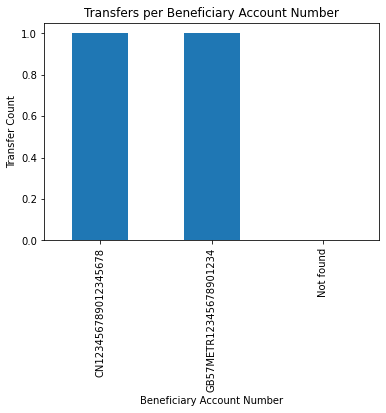

In [183]:
#for nesting we will assess the number of origin accounts that transfer money to the beneficiary. 

def count_transfers(df, beneficiary_col, originator_col):
    
    #############################################################################################    
    # This function counts the number of times money is transferred to                          #
    # each unique beneficiary account number. The function returns a new pandas dataframe with  #
    # the counts for each beneficiary account number.                                           #
    # To obtain a feeling for the data, we plot the counts                                      #
    ############################################################################################# 
    
    #group the dataframe by beneficiary account number and count the number of transfers
    transfer_counts = df.groupby(beneficiary_col)[originator_col].count()
    
    #create a new dataframe with the counts and the beneficiary account numbers as the index
    counts_df = pd.DataFrame(transfer_counts)
    
    #if the index contains 'Not found' (thus beneficiary_account_number = 'Not found', indicating it is missing), set the transfer count to 0
    if 'Not found' in counts_df.index:
        counts_df.loc['Not found'] = 0
    
    print('These are the findings per item. Highlighted is the number of times money is transferred to each unique beneficiary account number.')
    print(counts_df)

    #############################################################################################    
    #                                        Visualization                                      #
    ############################################################################################# 
    
    #transform to int
    counts_df['originator_account_number'] = counts_df['originator_account_number'].astype(int)

    #Bar chart visualization
    counts_df.plot(kind='bar', legend=None)
    plt.xlabel('Beneficiary Account Number')
    plt.ylabel('Transfer Count')
    plt.title('Transfers per Beneficiary Account Number')
    plt.show()

    return counts_df

counts_df = count_transfers(df, 'beneficiary_account_number', 'originator_account_number')



> e. Non-adherence to FATF Recommendation 16 -10 points 
<br>
> f. (https://www.fatfgafi.org/content/dam/recommandations/pdf/FATF%20Recommendations%202012.pdf.coredownload.inline.pdf) - 5 points

In [184]:
def FATF_compliance(df):
    
    #############################################################################################    
    # This function checks if there are any columns that contain missing or 'Not found' values, #                         
    # excluding a list of columns that are allowed to miss a value.                             #
    ############################################################################################# 

    allowed_cols=['transaction_direction', 'transaction_status', 'instrument_type', 'originator_middle_names_patronymic', 'beneficiary_middle_names_patronymic']
    missing_cols = []
    missing_items = []

    df['FATFCompl'] = True #initiate new column, with standard Compliance is 'True', this does not change if we find nothing suspicious.

    for item,content in df.iterrows(): 
    # code from https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
        
        for column in df.columns: 
            
            #check if df column is allowed to miss
            if column in allowed_cols: 
                continue 
            elif content[column] == 'Not found': #if content of the column is 'Not found', we classify it as non FATF compliance
                missing_cols.append(column)
                missing_items.append(item)
                df.loc[item,'FATFCompl'] = False #Change the earlier initiated 'True' to 'False' in the df
    
    #print the items that miss values
    print('These are the findings per item. In case of missing columns, the item is highlighted below:')
    for item in (set(missing_items)):
        print(item)
    
FATF_compliance(df)

These are the findings per item. In case of missing columns, the item is highlighted below:
example_1.txt
example_2.txt
example_3.txt


> g. Shell company characteristics using address and name data. - 5 points

In [185]:
#According to the below mentioned websites, Shell companies have the following characteristics. 
#We will assess two of these, as these are within our data capabilities.
#   1. Payments do not specify a purpose nor a reference of goods or services, and solely identify a contract or invoice number.
#   2. Typically have no physical presence (other than a PO box) 
#https://www.sigmaratings.com/knowledge-center/how-to-identify-a-shell-company-and-the-associated-red-flags#:~
#:text=According%20to%20the%20Financial%20Crimes,independent%20economic%20value.%E2%80%9D%20Shell%20companies

def shell_company(df):

    #############################################################################################    
    # This function checks if the the transaction message solely consists of 'invoice', 'inv.', #
    # 'contract' or 'contr.' and an unidentified value. Furthermore, it checks if the address   #
    # solely consists of po, or po box and an unidentified value                                #                                                     
    ############################################################################################# 

    #to check if the transaction message solely consists of 'invoice', 'inv.', 'contract' or 'contr.' and an unidentified value.
    invoice_regex = r"^(invoice|inv\.|contract|contr\.)\s*\d+.*$" 
    
    #to check if the address solely consists of po, or po box and an unidentified value   
    address_regex = r"^(po|po box)\s+\w+.*$" 
    
    #start looping through the rows of the df
    for i,r in df.iterrows(): 

        #check if transaction_message matches the invoice pattern, 
        # code from https://stackoverflow.com/questions/500864/case-insensitive-regular-expression-without-re-compile
        if re.match(invoice_regex, str(r['transaction_message']).lower(), re.IGNORECASE): 
            print("the following items have a suspicious payment reference: "+ "\n" + i)

            #check if beneficiary_address matches the address pattern,
            if re.match(address_regex, str(r['beneficiary_address']).lower(), re.IGNORECASE): 
                print("the following items have a suspicious address: "+ "\n" + i)

                #return true if both patterns are found, append this to a separate column in the df
                df.loc[i,'ShellComp'] = True 
                
        else:
            #return false if patterns are not found, append this to a separate column in the df
            df.loc[i,'ShellComp'] = False 
    print('These are the findings per item. In case suspicious Shell company related activities are found, the value is True.')
    print(df['ShellComp'])

shell_company(df)

These are the findings per item. In case suspicious Shell company related activities are found, the value is True.
example_1.txt    False
example_2.txt    False
example_3.txt    False
Name: ShellComp, dtype: object


> h. Trade based money laundering - 5 points<br>
<br>

According to the FATF/Egmont report: Trade-Based Money Laundering (TBML): Risk Indicators, the following criteria could indicate TBML:
<br>
- Contracts, invoices, or other trade documents display fees or prices that do not seem to be in line with commercial considerations, are inconsistent with market value, or 
significantly fluctuate from previous comparable transactions.<br>
<br>
- Payments are routed in a circle – funds are sent out from one country and received back in the same country, after passing through another country or countries<br>
<br>
- Contracts, invoices, or other trade documents have vague descriptions of the traded commodities, e.g. the subject of the contract is only described generically or non - specifically.<br>
<br>
Link to the report:
<br>
https://www.fatf-gafi.org/content/fatf-gafi/en/publications/Methodsandtrends/Trade-based-money-laundering-indicators.html



These are the findings per item. First, the total sum of transaction amounts is highlighted per originator_account_number.
originator_account_number
DE98765432101234567890     5000
NL20ABNA0404875234         9899
US12345678901234567890    10000
Name: transaction_amount, dtype: int32


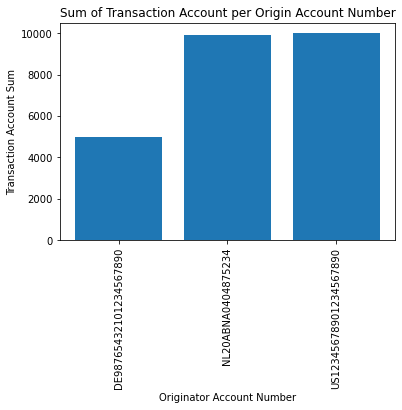

-----------------------------------------
These are the findings per item. In case suspicious Country routing related activities are found, the value is True.
example_1.txt    False
example_2.txt     True
example_3.txt    False
Name: susCountryRouting, dtype: object
-----------------------------------------
These are the findings per item. In case vague transaction message(s) are found, the value is True.
example_1.txt    False
example_2.txt    False
example_3.txt    False
Name: vague_Paym_Msg, dtype: object


In [186]:
def tbml(df):
    #############################################################################################    
    # This function consists of three parts                                                     #                                                     
    ############################################################################################# 

    ############################################################################################# 
    # First, the transaction total per originator name is calculated. With this, professional   #
    # judgement can be performed on if this amount is aligned with the commercial activities of #          
    # the originator                                                                            #
    #############################################################################################

    
    #transform to int
    df['transaction_amount'] = df['transaction_amount'].astype(int)

    #group by originator account and sum transaction amount
    originator_sum_grouped = df.groupby(['originator_account_number'])['transaction_amount'].sum()

    ############################################################################################# 
    # Second, the beneficairy_country and originator_country are assessed to check if they are  #
    # equal. If they are equal, the intermediary countries are assessed, to see if they differ  #
    # from the beneficairy_country and originator_country                                       #
    #############################################################################################

    for i,r in df.iterrows():

        #check if beneficiary country and originator country are equal
        if r['beneficiary_country'] == r['originator_country']:

            #if the aforementioned are equal, check if they differ from the _fi_ countries
            if beneficiary_fi_country != beneficiary_country and originator_fi_country != beneficiary_country:

                #if they differ 'susCountryRouting' is True
                df.loc[i,'susCountryRouting'] = True

        #else 'susCountryRouting' is False
        else:
            df.loc[i,'susCountryRouting'] = False

    ############################################################################################# 
    # Third, the transaction message is assessed to see if it solely consists of 'invoice',     #
    # 'inv.', 'contract' or 'contr.' and NO unidentified corresponding value, and thus can be   #
    # classified as vague                                                                       #
    #############################################################################################

    #Regex to check if the transaction message solely consists of 'invoice', 'inv.', 'contract' or 'contr.' and NO additional values.
    invoice_regex = r"^(invoice|inv\.|contract|contr\.)$"

    for i,r in df.iterrows(): # code from https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
        
        #check if transaction_message matches the invoice pattern, code from https://stackoverflow.com/questions/500864/case-insensitive-regular-expression-without-re-compile        
            if re.match(invoice_regex, str(r['transaction_message']).lower(), re.IGNORECASE): 
                    #print("the following items have a vague payment reference: "+ "\n" + i)
                    df.loc[i,'vague_Paym_Msg'] = True 
            else:
                #if the regex does not match, return false
                #print("the following item does not have a vague payment reference: "+ "\n" + i)
                df.loc[i,'vague_Paym_Msg'] = False 
    
    print('These are the findings per item. First, the total sum of transaction amounts is highlighted per originator_account_number.')
    print(originator_sum_grouped)

    # Create a bar chart of the sum of transaction account per origin account number
    plt.bar(originator_sum_grouped.index, originator_sum_grouped.values)
    plt.xlabel('Originator Account Number')
    plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees to make the account numbers more readable
    plt.ylabel('Transaction Account Sum')
    plt.title('Sum of Transaction Account per Origin Account Number')
    plt.show()
    
    print('-----------------------------------------')
    print('These are the findings per item. In case suspicious Country routing related activities are found, the value is True.')
    print(df['susCountryRouting'])
    print('-----------------------------------------')
    print('These are the findings per item. In case vague transaction message(s) are found, the value is True.')
    print(df['vague_Paym_Msg'])


tbml(df)

In [187]:
df.to_excel('MT103_analysis.xlsx') #export to Excel